In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
from wordcloud import WordCloud
import nltk

# DATASET

Dataset didapat dengan cara scraping pada website : https://www.antaranews.com/tag/rangkuman-berita, dengan mengambil bagian summary, title, text, dan link website sehingga dataset mempunyai 4 Atribute yaitu: Title, Text, Summary, Link news.

1. Title, Merupakan judul artikel berita
2. Text, Merupakan artikel atau text lengkap pada berita
3. Summary, Merupakan ringkasan singkat pada artikel berita atau text
4. Link news, Merupakan link yang akan menuju pada artikel berita

In [32]:
df = pd.read_csv('dataset_artikel_final.csv', index_col=0)

In [33]:
df['Text'] = df['Text'].str.strip('\'"')
df = df.dropna()
df

,Title,Text,Summary,Link News
0,Alex Noerdin diperiksa 12 jam terkait kasus ko...,Palembang (ANTARA) - Mantan Gubernur Sumatera ...,Mantan Gubernur Sumatera Selatan Alex Noerdin ...,https://m.antaranews.com/berita/4785245/alex-n...
1,Kejagung ungkap peran advokat-Dirpem TV swasta...,Jakarta (ANTARA) - Kejaksaan Agung (Kejagung) ...,Kejaksaan Agung (Kejagung) mengungkapkan peran...,https://m.antaranews.com/berita/4785173/kejagu...
2,Gubernur Dedi Mulyadi mau dibunuh,"Kalau ada ancaman itu, ya risiko bagi seorang ...",Gubernur Jawa Barat Dedi Mulyadi mendapat anca...,https://m.antaranews.com/berita/4786861/gubern...
3,TNI AU tegaskan Puskopau Halim bukan bagian da...,Jakarta (ANTARA) - Markas Besar TNI Angkatan U...,Markas Besar TNI Angkatan Udara menegaskan Pus...,https://m.antaranews.com/berita/4791125/tni-au...
4,UGM sebut sudah berkomunikasi dengan polisi so...,"UGM dengan tegas, kalau ada permintaan resmi d...",Universitas Gadjah Mada (UGM) menyatakan bahwa...,https://m.antaranews.com/berita/4790097/ugm-se...
...,...,...,...,...
609,PDI Perjuangan dorong revisi UU KPK,Jakarta (ANTARA) - PDI Perjuangan mendorong re...,PDI Perjuangan mendorong revisi Undang-Undang ...,https://m.antaranews.com/berita/4140750/pdi-pe...
610,Presiden instruksikan Prabowo kirim nakes dan ...,Saya lapor ke Pak Presiden dan Presiden sangat...,Presiden Joko Widodo menginstruksikan Menteri ...,https://m.antaranews.com/berita/4139763/presid...
611,Komisi I DPR setujui hibah kapal Bucheon 773 d...,Jakarta (ANTARA) - Komisi I DPR menyetujui pen...,Komisi I DPR menyetujui penerimaan hibah alat ...,https://m.antaranews.com/berita/4140792/komisi...
612,KPU RI simulasikan penggunaan e-Coklit untuk P...,Jakarta (ANTARA) - Komisi Pemilihan Umum RI me...,Komisi Pemilihan Umum RI menyimulasikan penggu...,https://m.antaranews.com/berita/4140597/kpu-ri...


# EDA

### Dimensi Data
Dataset Memiliki 4 Attribut dan 610 Record


In [34]:
display(df.shape)

(610, 4)

### Distribusi panjang kata dan karakter

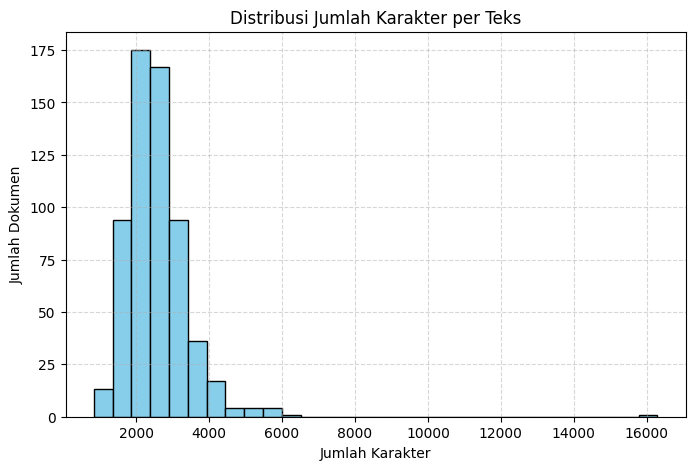

'Rata Rata panjang karakter setiap artiken\n'

2575

In [35]:
# JUMLAH KARAKTER
df['Character_len'] = df['Text'].apply(len)
plt.figure(figsize=(8,5))
plt.hist(df['Character_len'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Karakter per Teks')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah Dokumen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

display("Rata Rata panjang karakter setiap artiken\n")
display(math.floor(df['Character_len'].mean()))


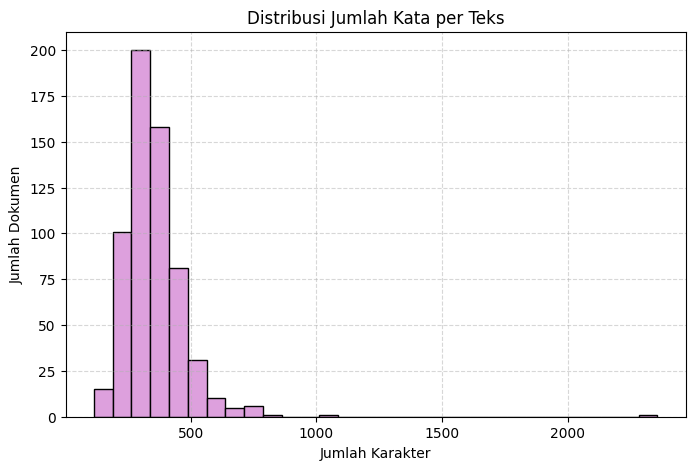

'Rata Rata panjang karakter setiap artikel'

354

In [36]:
#JUMLAH KATA
df['word_length'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
plt.hist(df['word_length'], bins=30, color='plum', edgecolor='black')
plt.title('Distribusi Jumlah Kata per Teks')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah Dokumen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


display("Rata Rata panjang karakter setiap artikel")
display(math.floor(df['word_length'].mean()))

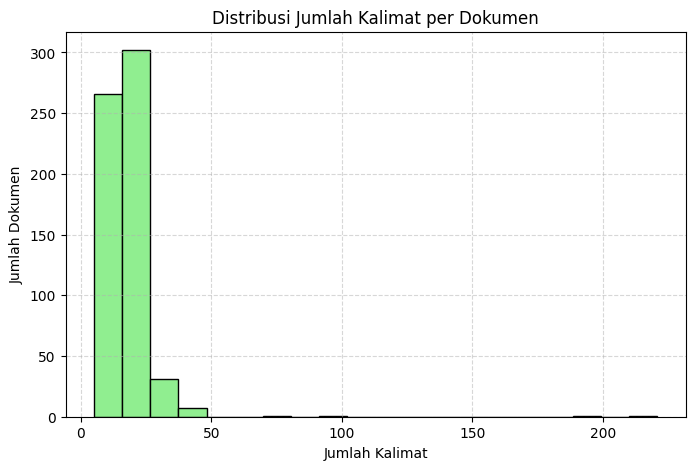

'Rata Rata panjang kalimat  setiap artikel'

18

In [37]:
# Jumlah Kalimat

def count_sentence(teks):
    if pd.isnull(teks):
        return 0
    kalimat = re.split(r'[.!?]+', teks)
    kalimat = [k for k in kalimat if k.strip()]
    return len(kalimat)

df['sentence_count'] = df['Text'].apply(count_sentence)

plt.figure(figsize=(8,5))
plt.hist(df['sentence_count'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Jumlah Kalimat per Dokumen')
plt.xlabel('Jumlah Kalimat')
plt.ylabel('Jumlah Dokumen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

display("Rata Rata panjang kalimat  setiap artikel")
display(math.floor(df['sentence_count'].mean()))

### WORD CLOUD

In [38]:
from collections import Counter
all_words = ' '.join(df['Text']).lower().split()
unigram_freq = Counter(all_words).most_common(20)
display(unigram_freq)

[('yang', 4682),
 ('dan', 4609),
 ('di', 3868),
 ('untuk', 2126),
 ('dengan', 1949),
 ('dalam', 1836),
 ('dari', 1666),
 ('jakarta', 1359),
 ('pada', 1344),
 ('ini', 1212),
 ('juga', 1073),
 ('akan', 1066),
 ('tidak', 1029),
 ('itu', 995),
 ('kata', 986),
 ('bahwa', 805),
 ('ada', 781),
 ('tahun', 748),
 ('ke', 737),
 ('oleh', 704)]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram
vectorizer_bi = CountVectorizer(ngram_range=(3,3))
X_bi = vectorizer_bi.fit_transform(df['Text'])

bigram_freq = zip(vectorizer_bi.get_feature_names_out(), X_bi.toarray().sum(axis=0))
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:20]
display(bigram_freq)

[('tindak pidana korupsi', np.int64(95)),
 ('presiden prabowo subianto', np.int64(77)),
 ('di jakarta jumat', np.int64(69)),
 ('di jakarta rabu', np.int64(69)),
 ('undang undang nomor', np.int64(68)),
 ('di jakarta kamis', np.int64(65)),
 ('polda metro jaya', np.int64(61)),
 ('jakarta antara menteri', np.int64(60)),
 ('di jakarta selasa', np.int64(58)),
 ('di jakarta senin', np.int64(50)),
 ('komisi pemberantasan korupsi', np.int64(50)),
 ('yang ada di', np.int64(50)),
 ('diterima di jakarta', np.int64(47)),
 ('menteri koordinator bidang', np.int64(46)),
 ('dikonfirmasi di jakarta', np.int64(44)),
 ('pemberantasan korupsi kpk', np.int64(44)),
 ('oleh karena itu', np.int64(43)),
 ('jakarta antara wakil', np.int64(42)),
 ('polres metro jakarta', np.int64(42)),
 ('bup xxiii 2025', np.int64(41))]

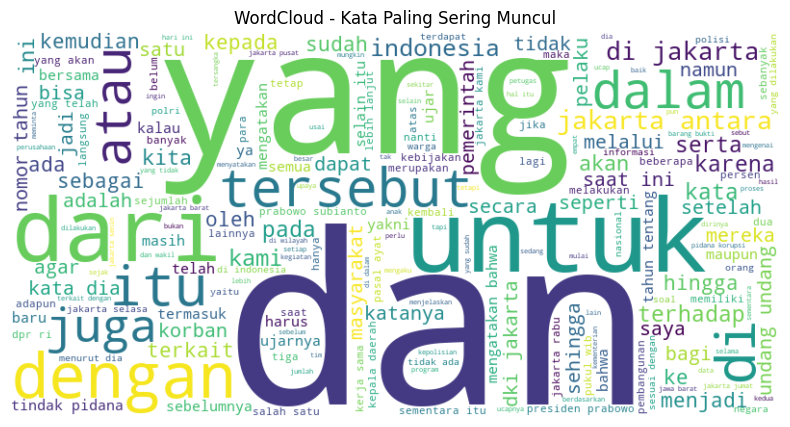

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_all = ' '.join(df['Text']).lower()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Kata Paling Sering Muncul')
plt.show()

### TF - IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50)
X_tfidf = tfidf.fit_transform(df['Text'])

# Tampilkan kata dan skor rata-rata
tfidf_scores = X_tfidf.toarray().mean(axis=0)
tfidf_words = tfidf.get_feature_names_out()
hasil = sorted(zip(tfidf_words, tfidf_scores), key=lambda x: x[1], reverse=True)

for kata, skor in hasil:
    print(f"{kata}: {skor:.4f}")

yang: 0.2727
dan: 0.2709
di: 0.2368
jakarta: 0.1495
untuk: 0.1384
dengan: 0.1279
dalam: 0.1209
itu: 0.1115
dari: 0.1108
ini: 0.1061
pada: 0.0976
tersebut: 0.0898
akan: 0.0890
indonesia: 0.0879
tidak: 0.0865
tahun: 0.0830
presiden: 0.0811
juga: 0.0799
ada: 0.0769
dia: 0.0746
ke: 0.0728
2024: 0.0727
bahwa: 0.0713
kata: 0.0712
kita: 0.0676
kami: 0.0665
atau: 0.0646
sebagai: 0.0640
saat: 0.0638
oleh: 0.0620
telah: 0.0614
sudah: 0.0607
kepada: 0.0576
menjadi: 0.0569
negara: 0.0568
melakukan: 0.0560
bisa: 0.0558
2025: 0.0557
masyarakat: 0.0550
orang: 0.0545
karena: 0.0543
daerah: 0.0542
pemerintah: 0.0539
terkait: 0.0536
prabowo: 0.0524
ri: 0.0521
lebih: 0.0510
antara: 0.0509
mengatakan: 0.0500
kepala: 0.0485


## PREPROCESSING

In [42]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

def preprocess_extractive(text):
    text = text.lower()
    # Hilangkan frasa seperti "jakarta (antara) -", "surabaya (antara) -" di awal
    text = re.sub(r"^[a-z\s]*\(antara\)\s*-\s*", "", text)
    # Hilangkan URL, HTML, emoji, dan simbol non-huruf/angka
    text = re.sub(r"http\S+|www\S+|<.*?>|[^\x00-\x7F]+|[^a-zA-Z0-9\s]", "", text)
    # Tokenisasi kalimat
    sentences = sent_tokenize(text)
    # Hilangkan spasi berlebih dan kalimat kosong
    clean_sentences = [' '.join(s.split()) for s in sentences if s.strip()]
    return clean_sentences

df['clean_sentences'] = df['Text'].apply(preprocess_extractive)

df = df[['Title', 'Text', 'Summary', 'Link News', 'clean_sentences']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Boinkk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## IMPLEMENTATION

Data yang akan di test:

In [43]:
from IPython.display import HTML

text = df['Text'][1]
text = text.replace('\n', ' ')
text = re.sub(r'^[A-Z][a-zA-Z\s\-()]*\(ANTARA\)\s-\s', '', text)
display(HTML(f"<pre>{text}</pre>"))

In [44]:
# nltk.download('punkt')

In [45]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# from nltk.tokenize import sent_tokenize

# def mmr(doc_text, summary_length=2, lambda_param=0.7):
#     # 1. Tokenisasi kalimat
#     sentences = sent_tokenize(doc_text)
    
#     # 2. TF-IDF Vektorisasi
#     vectorizer = TfidfVectorizer()
#     tfidf_matrix = vectorizer.fit_transform(sentences)

#     # 3. Hitung similarity antar kalimat dan dengan dokumen
#     doc_vector = tfidf_matrix.mean(axis=0)
#     doc_sim = cosine_similarity(tfidf_matrix, doc_vector)  # similarity terhadap dokumen
#     sim_matrix = cosine_similarity(tfidf_matrix)           # antar kalimat

#     # 4. MMR Selection
#     selected = []
#     candidates = list(range(len(sentences)))

#     while len(selected) < summary_length and candidates:
#         mmr_scores = []
#         for idx in candidates:
#             relevance = doc_sim[idx][0]
#             redundancy = max([sim_matrix[idx][j] for j in selected], default=0)
#             mmr_score = lambda_param * relevance - (1 - lambda_param) * redundancy
#             mmr_scores.append((idx, mmr_score))

#         # Ambil kalimat dengan skor MMR tertinggi
#         selected_idx = max(mmr_scores, key=lambda x: x[1])[0]
#         selected.append(selected_idx)
#         candidates.remove(selected_idx)

#         # Urutkan kembali sesuai posisi di teks
#     selected.sort()
#     summary = " ".join([sentences[i] for i in selected])
#     return summary

# text = df['Text'][2]

# summary = mmr(text, summary_length=5, lambda_param=0.7)
# print(f'Hasil Ringkasan : {summary}')

## Tokenizazi Kalimat

In [46]:
def tokenize_sentence(text):
    return nltk.sent_tokenize(text)

sentences = tokenize_sentence(text)

print("Hasil Tokenisasi Kalimat")
for i, sentence in enumerate(sentences, 1):
    print(f'{i}. {sentence}')

Hasil Tokenisasi Kalimat
1. Kejaksaan Agung (Kejagung) mengungkapkan peran advokat MS (Marcella Santoso), advokat dan dosen JS (Junaedi Saibih), dan Direktur Pemberitaan sebuah TV swasta bersiaran di Jakarta TB (Tian Bahtiar) dalam kasus perintangan penyidikan (obstruction of justice).
2. Direktur Penyidikan pada Jaksa Agung Muda Bidang Tindak Pidana Khusus (Jampidsus) Kejagung Abdul Qohar di Gedung Kejaksaan Agung, Jakarta, Selasa dini hari, mengatakan bahwa persekongkolan ini dimulai ketika tersangka MS dan JS memerintahkan tersangka TB untuk membuat narasi negatif yang menyudutkan Kejagung.
3. Adapun narasi negatif tersebut untuk penanganan perkara tindak pidana korupsi tata niaga komoditas timah di wilayah izin usaha pertambangan (IUP) PT Timah Tbk.
4. tahun 2015–2022, tindak pidana korupsi dalam kegiatan importasi gula atas nama tersangka Tom Lembong, dan perkara korupsi pemberian fasilitas ekspor CPO.
5. Qohar mengemukakan bahwa narasi negatif itu disiarkan dalam berbagai bentuk 

In [47]:
# 2. Tokenisasi kata
def tokenize_words(sentences):
    return [nltk.word_tokenize(sentence.lower()) for sentence in sentences]

tokenized_sentences = tokenize_words(sentences)

# 3. Buat vocabulary 
all_words = sorted(set(word for sentence in tokenized_sentences for word in sentence))
print("=== Vocabulary (Daftar Kata Unik) ===")
print(all_words)
print("\n")

=== Vocabulary (Daftar Kata Unik) ===
['(', ')', ',', '.', '1', '1999', '20', '2001', '2015–2022', '21', '31', '55', 'abdul', 'acara', 'ada', 'adalah', 'adapun', 'advokat', 'agung', 'akun-akun', 'antara', 'atas', 'atau', 'ayat', 'bagi', 'bahtiar', 'bahwa', 'beberapa', 'benar', 'bentuk', 'berbagai', 'berita', 'bersiaran', 'bidang', 'cabang', 'cpo', 'dalam', 'dan', 'dapat', 'dari', 'demonstrasi', 'demonstrasi-demonstrasi', 'dengan', 'depan', 'di', 'dia', 'dibebaskan', 'dibuat', 'diharapkan', 'dikenai', 'dilakukan', 'diliput', 'dimulai', 'dini', 'dinilai', 'dipublikasikan', 'direktur', 'disiarkan', 'ditahan', 'ditangani', 'ditetapkan', 'diubah', 'dosen', 'dugaan', 'ekspor', 'fasilitas', 'gedung', 'gula', 'hak-hak', 'harapan', 'hari', 'hingga', 'hukum', 'importasi', 'indikasi', 'ini', 'itu', 'iup', 'izin', 'jabatannya', 'jadi', 'jakarta', 'jaksa', 'jaktv', 'jampidsus', 'jelas', 'js', 'juga', 'junaedi', 'juncto', 'justice', 'kantong', 'kasus', 'kata', 'katanya', 'ke', 'ke-1', 'kegiatan', 'k

### TF

In [48]:
def compute_tf(tokenized_sentences, all_words):
    tf_matrix = []
    for sentence in tokenized_sentences:
        tf_row = [sentence.count(word) for word in all_words]
        tf_matrix.append(tf_row)
    return np.array(tf_matrix)

tf_matrix = compute_tf(tokenized_sentences, all_words)
tf_df = pd.DataFrame(tf_matrix, columns=all_words)
tf_df.insert(0, 'Kalimat', sentences)

print("=== Term Frequency (TF) ===")
print(tf_df)
print("\n")

=== Term Frequency (TF) ===
                                              Kalimat  (  )  ,  .  1  1999  \
0   Kejaksaan Agung (Kejagung) mengungkapkan peran...  5  5  2  1  0     0   
1   Direktur Penyidikan pada Jaksa Agung Muda Bida...  1  1  3  1  0     0   
2   Adapun narasi negatif tersebut untuk penangana...  1  1  0  1  0     0   
3   tahun 2015–2022, tindak pidana korupsi dalam k...  0  0  2  1  0     0   
4   Qohar mengemukakan bahwa narasi negatif itu di...  0  0  1  1  0     0   
5   Tersangka JS, kata dia, membuat narasi dan opi...  0  0  2  1  0     0   
6   Tersangka TB lantas menuangkan narasi yang tel...  0  0  0  1  0     0   
7   “Kejaksaan pun dinilai negatif dan telah merug...  0  0  1  1  0     0   
8   MS dan JS, lanjut Qohar, juga menyelenggarakan...  0  0  4  1  0     0   
9   Kegiatan tersebut kemudian diliput oleh tersan...  0  0  1  1  0     0   
10  Lebih lanjut, Qohar mengungkapkan bahwa MS dan...  0  0  3  1  0     0   
11  Kegiatan demonstrasi itu juga di

### IDF

In [49]:
def compute_idf(tokenized_sentences, all_words):
    N = len(tokenized_sentences)
    idf_values = []
    for word in all_words:
        # jumlah kalimat yang mengandung kata tersebut
        df = sum(1 for sentence in tokenized_sentences if word in sentence)
        # rumus smoothing IDF
        idf = math.log((N + 1) / (df + 1)) + 1
        idf_values.append(idf)
    return np.array(idf_values)

idf_values = compute_idf(tokenized_sentences, all_words)
idf_df = pd.DataFrame([idf_values], columns=all_words, index=["IDF"])

print("=== Inverse Document Frequency (IDF) ===")
print(idf_df)
print("\n")

=== Inverse Document Frequency (IDF) ===
           (        )         ,    .         1      1999        20      2001  \
IDF  2.15268  2.15268  1.236389  1.0  3.251292  3.251292  2.845827  3.251292   

     2015–2022        21  ...  undang-undang    ungkap     untuk     usaha  \
IDF   3.251292  3.251292  ...       3.251292  3.251292  2.335001  3.251292   

           uu   wilayah      yang   youtube         “         ”  
IDF  3.251292  3.251292  1.747214  3.251292  2.558145  2.558145  

[1 rows x 257 columns]




### TF-IDF

In [50]:
def compute_tfidf(tf_matrix, idf_values):
    tfidf_matrix = []
    for tf_row in tf_matrix:
        tfidf_row = [tf * idf for tf, idf in zip(tf_row, idf_values)]
        tfidf_matrix.append(tfidf_row)
    return np.array(tfidf_matrix)

tfidf_matrix = compute_tfidf(tf_matrix, idf_values)
tfidf_df = pd.DataFrame(tfidf_matrix, columns=all_words)
tfidf_df.insert(0, 'Kalimat', sentences)

print("=== TF-IDF ===")
print(tfidf_df)

=== TF-IDF ===
                                              Kalimat          (          )  \
0   Kejaksaan Agung (Kejagung) mengungkapkan peran...  10.763398  10.763398   
1   Direktur Penyidikan pada Jaksa Agung Muda Bida...   2.152680   2.152680   
2   Adapun narasi negatif tersebut untuk penangana...   2.152680   2.152680   
3   tahun 2015–2022, tindak pidana korupsi dalam k...   0.000000   0.000000   
4   Qohar mengemukakan bahwa narasi negatif itu di...   0.000000   0.000000   
5   Tersangka JS, kata dia, membuat narasi dan opi...   0.000000   0.000000   
6   Tersangka TB lantas menuangkan narasi yang tel...   0.000000   0.000000   
7   “Kejaksaan pun dinilai negatif dan telah merug...   0.000000   0.000000   
8   MS dan JS, lanjut Qohar, juga menyelenggarakan...   0.000000   0.000000   
9   Kegiatan tersebut kemudian diliput oleh tersan...   0.000000   0.000000   
10  Lebih lanjut, Qohar mengungkapkan bahwa MS dan...   0.000000   0.000000   
11  Kegiatan demonstrasi itu juga dip

In [52]:
tfidf_df

,Kalimat,(,),",",.,1,1999,20,2001,2015–2022,...,undang-undang,ungkap,untuk,usaha,uu,wilayah,yang,youtube,“,”
0,Kejaksaan Agung (Kejagung) mengungkapkan peran...,10.763398,10.763398,2.472778,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Direktur Penyidikan pada Jaksa Agung Muda Bida...,2.152680,2.152680,3.709166,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.335001,0.000000,0.000000,0.000000,1.747214,0.000000,0.000000,0.000000
2,Adapun narasi negatif tersebut untuk penangana...,2.152680,2.152680,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.335001,3.251292,0.000000,3.251292,0.000000,0.000000,0.000000,0.000000
3,"tahun 2015–2022, tindak pidana korupsi dalam k...",0.000000,0.000000,2.472778,1.0,0.000000,0.000000,0.000000,0.000000,3.251292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Qohar mengemukakan bahwa narasi negatif itu di...,0.000000,0.000000,1.236389,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Tersangka JS, kata dia, membuat narasi dan opi...",0.000000,0.000000,2.472778,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.494429,0.000000,0.000000,0.000000
6,Tersangka TB lantas menuangkan narasi yang tel...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.747214,0.000000,0.000000,0.000000
7,“Kejaksaan pun dinilai negatif dan telah merug...,0.000000,0.000000,1.236389,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.747214,0.000000,2.558145,2.558145
8,"MS dan JS, lanjut Qohar, juga menyelenggarakan...",0.000000,0.000000,4.945555,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.335001,0.000000,0.000000,0.000000,1.747214,0.000000,0.000000,0.000000
9,Kegiatan tersebut kemudian diliput oleh tersan...,0.000000,0.000000,1.236389,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.251292,0.000000,0.000000


Cosine Similarity

In [53]:
# Code Manual

import numpy as np

def dot(vektor1, vektor2):
  if len(vektor1) != len(vektor2):
    raise ValueError("Vektor untuk dot product harus memiliki panjang yang sama.")
  return np.sum(vektor1 * vektor2)

def magnitudo(vektor):
  return np.sqrt(np.sum(vektor**2))
  
def cosine_similarity(vektor1, vektor2):
  dot_product = dot(vektor1, vektor2)
  norm_vektor1 = magnitudo(vektor1)
  norm_vektor2 = magnitudo(vektor2)

  if norm_vektor1 == 0 or norm_vektor2 == 0:
    return 0.0
  else:
    similarity = dot_product / (norm_vektor1 * norm_vektor2)
    return similarity

def cosine_similarity_matrix(matriks_vektor):
  jumlah_vektor = matriks_vektor.shape[0]
  similarity_matrix = np.zeros((jumlah_vektor, jumlah_vektor))

  for i in range(jumlah_vektor):
    for j in range(jumlah_vektor):
      vektor_i = matriks_vektor[i]
      vektor_j = matriks_vektor[j]
      similarity_matrix[i, j] = cosine_similarity(vektor_i, vektor_j)

  return similarity_matrix

Maximal Margin Relevence

In [56]:

def mmr(doc_embedding, sentence_embeddings, sentences, top_n=3, lambda_param=0.5):
    """
    Algoritma MMR yang diperbaiki untuk menggunakan cosine_similarity yang benar
    """
    selected = []
    candidates = list(range(len(sentences)))

    doc_sim = []
    for i in range(len(sentence_embeddings)):
        sim = cosine_similarity(doc_embedding, sentence_embeddings[i])
        doc_sim.append(sim)
    doc_sim = np.array(doc_sim)
    
    selected.append(np.argmax(doc_sim))
    candidates.remove(selected[0])

    for _ in range(top_n - 1):
        mmr_scores = []
        for candidate in candidates:
            sim_to_doc = doc_sim[candidate]
            
            similarities_to_selected = []
            for i in selected:
                sim = cosine_similarity(sentence_embeddings[candidate], sentence_embeddings[i])
                similarities_to_selected.append(sim)
            
            sim_to_selected = max(similarities_to_selected) if similarities_to_selected else 0
            mmr_score = lambda_param * sim_to_doc - (1 - lambda_param) * sim_to_selected
            mmr_scores.append((candidate, mmr_score))
        
        best_candidate = max(mmr_scores, key=lambda x: x[1])[0]
        selected.append(best_candidate)
        candidates.remove(best_candidate)

    return [sentences[i] for i in selected]

In [57]:
def summarize_mmr(text, summary_length=3, lambda_param=0.5):

    sentences = np.array(tokenize_sentence(text))
    print(f"Jumlah kalimat: {len(sentences)}")
    
    
    tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]
    
   
    all_words = sorted(set(word for sentence in tokenized_sentences for word in sentence))
    print(f"Vocabulary size: {len(all_words)}")
    
    
    tf_matrix = compute_tf(tokenized_sentences, all_words)
    
  
    idf_values = compute_idf(tokenized_sentences, all_words)
    
    
    tfidf_matrix = compute_tfidf(tf_matrix, idf_values)
    print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
    
   
    doc_embedding = tfidf_matrix.mean(axis=0)
    
    
    return mmr(doc_embedding, tfidf_matrix, sentences, summary_length, lambda_param)

### PENERAPAN ALGORITMA

In [60]:
text = """
    Indonesia adalah negara kepulauan terbesar di dunia yang terletak di Asia Tenggara. 
    Negara ini memiliki lebih dari 17.000 pulau dan merupakan rumah bagi lebih dari 270 juta orang. 
    Ibu kotanya adalah Jakarta, kota metropolitan yang padat. 
    Bahasa resmi negara ini adalah Bahasa Indonesia. 
    Indonesia juga dikenal dengan keanekaragaman budaya dan sumber daya alamnya yang melimpah.
    """
    
try:
    summary = summarize_mmr(text, summary_length=3, lambda_param=0.7)
    combined_summary = ' '.join(sentence.strip() for sentence in summary)
    print("\n=== RINGKASAN MMR ===")
    print(combined_summary)
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()


Jumlah kalimat: 5
Vocabulary size: 43
TF-IDF matrix shape: (5, 43)

=== RINGKASAN MMR ===
Negara ini memiliki lebih dari 17.000 pulau dan merupakan rumah bagi lebih dari 270 juta orang. Indonesia adalah negara kepulauan terbesar di dunia yang terletak di Asia Tenggara. Indonesia juga dikenal dengan keanekaragaman budaya dan sumber daya alamnya yang melimpah.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbb1ca33-f14e-49b9-a29c-8552bed5bd4d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>